In [12]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
print (sns.__version__)

0.13.0


In [13]:
###read in row normalized confusion matrix info 
met_df = pd.read_csv("Final_Patch_Seq_RFC_Conf_Matrix_RowNorm.csv", index_col = [0])
met_df.columns = met_df.columns.str.split(' ').str[0]
met_df.index  = met_df.index.str.split(' ').str[0]
met_df.columns = met_df.columns.str.replace('-MET-', '-')
met_df.index  = met_df.index.str.replace('-MET-', '-')

met_df = met_df [['Lamp5-1', 'Pvalb-1', 'Pvalb-2','Pvalb-3', 'Pvalb-4', 'Sncg-1', 'Sst-1', 'Sst-2', 'Sst-3', 'Sst-4','Sst-5', 'Sst-6', 'Sst-7', 'Sst-8', 'Sst-9','Sst-10',  'Sst-12',  'Sst-13',  'Vip-1', 'Vip-2', 'Vip-4','Vip-5']]
met_df  = met_df.reindex(['Lamp5-1', 'Pvalb-1', 'Pvalb-2','Pvalb-3', 'Pvalb-4', 'Sncg-1', 'Sst-1', 'Sst-2', 'Sst-3', 'Sst-4','Sst-5', 'Sst-6', 'Sst-7', 'Sst-8', 'Sst-9','Sst-10',  'Sst-12',  'Sst-13',  'Vip-1', 'Vip-2', 'Vip-4','Vip-5'])
met_df_per = met_df.multiply(100)
diaglabel  = pd.Series(np.diag(met_df_per), index=[met_df_per.index, met_df_per.columns])

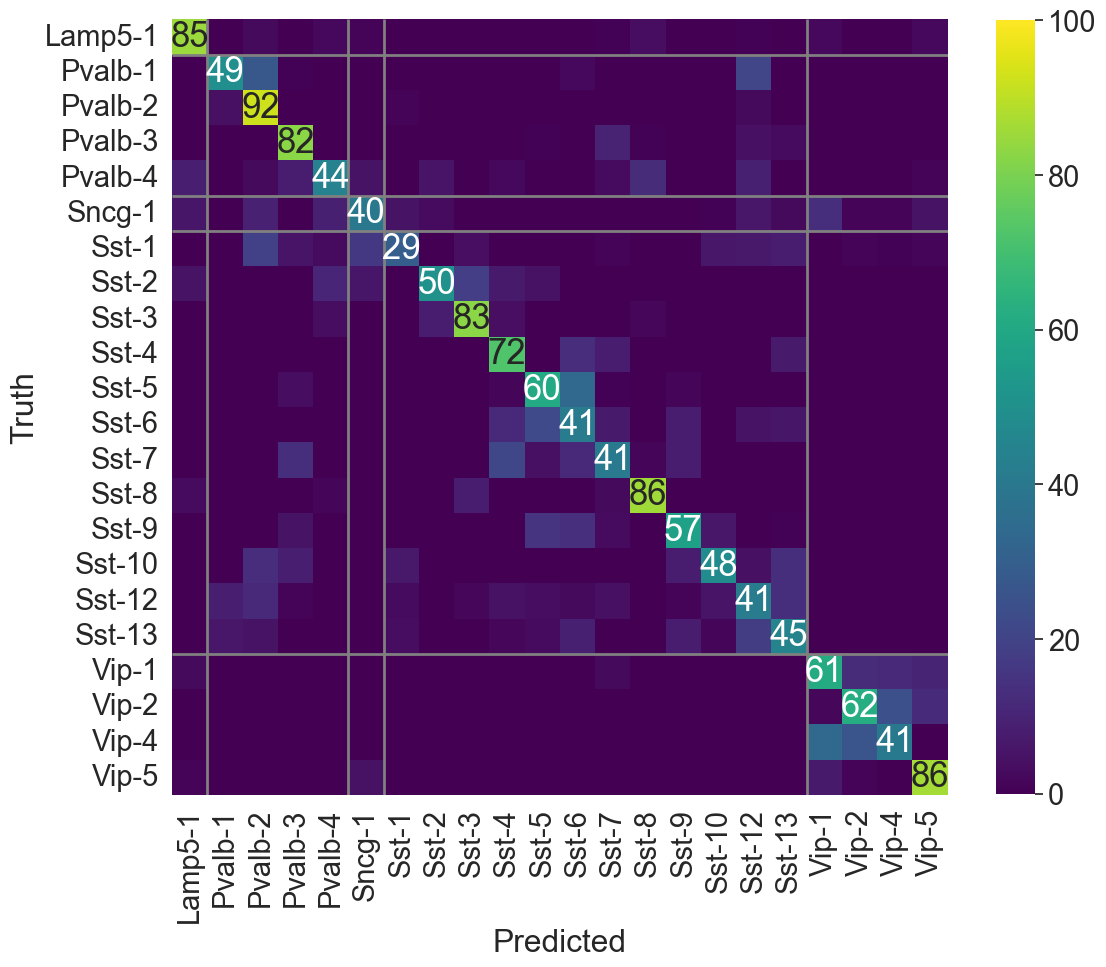

In [14]:
###plot confusion matrix of MET-type truth vs prediction
plt.figure(figsize = (12,12))
sns.set(font_scale = 1.9)
off_diag_mask = np.eye(*met_df_per.shape, dtype=bool)

ax = sns.heatmap(met_df_per, square = True, yticklabels = True, annot = False, annot_kws={"size":15}, vmin = 0, vmax = 100, cbar_kws = {"shrink":0.73}, cmap = 'viridis')
sns.heatmap(met_df_per, square = True, yticklabels = True, vmin = 0, vmax = 100, mask = ~off_diag_mask ,cbar = False, cmap = 'viridis', annot = True, annot_kws={"size":25}, ax = ax)

ax.hlines([1, 5,6,18], *ax.get_xlim(), color = 'gray', linewidth = 2)
ax.vlines([1, 5,6,18], *ax.get_ylim(), color = 'gray', linewidth = 2)
plt.ylabel("Truth")
plt.xlabel("Predicted")
plt.tight_layout()
# plt.savefig('Final_Patch_Seq_RFC_Conf_Matrix_RowNorm_tight_diag_viridis_reorder_lgfont_9_05_24_Blues.pdf')

In [15]:
###calculate the normalized value of true vs predicted MET-type - grouped by subclass

met_num_df = pd.read_csv("Final_Patch_Seq_RFC_Conf_Matrix.csv", index_col = [0])
print (met_num_df.head())
# Core_I3_ConfMat_MET-type Label
met_num_df.columns = met_num_df.columns.str.split(' ').str[0]
met_num_df.index  = met_num_df.index.str.split(' ').str[0]
met_num_df.columns = met_num_df.columns.str.replace('-MET-', '-')
met_num_df.index  = met_num_df.index.str.replace('-MET-', '-')
met_num_df = met_num_df [['Lamp5-1', 'Pvalb-1', 'Pvalb-2','Pvalb-3', 'Pvalb-4', 'Sncg-1', 'Sst-1', 'Sst-2', 'Sst-3', 'Sst-4','Sst-5', 'Sst-6', 'Sst-7', 'Sst-8', 'Sst-9','Sst-10',  'Sst-12',  'Sst-13',  'Vip-1', 'Vip-2', 'Vip-4','Vip-5']]
met_num_df  = met_num_df.reindex(['Lamp5-1', 'Pvalb-1', 'Pvalb-2','Pvalb-3', 'Pvalb-4', 'Sncg-1', 'Sst-1', 'Sst-2', 'Sst-3', 'Sst-4','Sst-5', 'Sst-6', 'Sst-7', 'Sst-8', 'Sst-9','Sst-10',  'Sst-12',  'Sst-13',  'Vip-1', 'Vip-2', 'Vip-4','Vip-5'])

met_num_df['Pvalb_total'] = met_num_df['Pvalb-1'] + met_num_df['Pvalb-2'] + met_num_df['Pvalb-3'] + met_num_df['Pvalb-4']
met_num_df['Sst_total'] = met_num_df['Sst-1'] + met_num_df['Sst-2'] + met_num_df['Sst-3'] + met_num_df['Sst-4'] + met_num_df['Sst-5'] + met_num_df['Sst-6'] + met_num_df['Sst-7'] + met_num_df['Sst-8'] + met_num_df['Sst-9'] + met_num_df['Sst-10'] + met_num_df['Sst-12'] + met_num_df['Sst-13']
met_num_df['VIP_total'] = met_num_df['Vip-1'] + met_num_df['Vip-2'] + met_num_df['Vip-4'] + met_num_df['Vip-5']
met_num_df_sub =met_num_df[['Lamp5-1', 'Pvalb_total', 'Sncg-1', 'Sst_total', 'VIP_total']]

pvrows = met_num_df_sub.iloc[1:5]
pvr = pd.Series(pvrows.sum(axis = 0), name = "Pvalb_total")
pvrf = pvr.to_frame().T
met_num_df_sub = pd.concat([met_num_df_sub, pvrf])

sstrows = met_num_df_sub.iloc[6:18]
sstr = pd.Series(sstrows.sum(axis = 0), name = "Sst_total")
sstrf = sstr.to_frame().T
met_num_df_sub = pd.concat([met_num_df_sub, sstrf])

viprows = met_num_df_sub.iloc[18:22]
vipr = pd.Series(viprows.sum(axis = 0), name = "VIP_total")
viprf = vipr.to_frame().T
met_num_df_sub = pd.concat([met_num_df_sub, viprf])


met_num_collapsed = met_num_df_sub.iloc[[0, 22, 5, 23, 24]]

total_true = met_num_collapsed['Lamp5-1'] + met_num_collapsed['Pvalb_total'] + met_num_collapsed['Sncg-1'] + met_num_collapsed['Sst_total'] + met_num_collapsed['VIP_total']

met_norm_collapsed=met_num_collapsed.div(met_num_collapsed.sum(axis=1), axis=0)
met_subclass_df_per = met_norm_collapsed.multiply(100)
diaglabel_subclass  = pd.Series(np.diag(met_subclass_df_per), index=[met_subclass_df_per.index, met_subclass_df_per.columns])

met_subclass_df_per.index  = met_subclass_df_per.index.str.replace('_total', '')
met_subclass_df_per.columns = met_subclass_df_per.columns.str.replace('_total', '')

met_subclass_df_per.index  = met_subclass_df_per.index.str.replace('-1', '')
met_subclass_df_per.columns  = met_subclass_df_per.columns.str.replace('-1', '')

             Pvalb-MET-2  Sst-MET-12  Sst-MET-8  Sst-MET-7  Sst-MET-5  \
Pvalb-MET-2        591.0        15.0        0.0        0.0        0.0   
Sst-MET-12         121.0       455.0        1.0       44.0       35.0   
Sst-MET-8            0.0         0.0      308.0        9.0        0.0   
Sst-MET-7            0.0         0.0        3.0       90.0        9.0   
Sst-MET-5            0.0         0.0        0.0        1.0      145.0   

             Sst-MET-4  Sncg-MET-1  Lamp5-MET-1  Pvalb-MET-4  Sst-MET-13  ...  \
Pvalb-MET-2        0.0         2.0          0.0          0.0         1.0  ...   
Sst-MET-12        50.0         0.0          0.0          0.0       143.0  ...   
Sst-MET-8          0.0         0.0         11.0          5.0         0.0  ...   
Sst-MET-7         47.0         0.0          0.0          0.0         0.0  ...   
Sst-MET-5          3.0         0.0          0.0          0.0         0.0  ...   

             Sst-MET-10  Sst-MET-9  Vip-MET-5  Sst-MET-3  Vip-MET-1  \
Pva

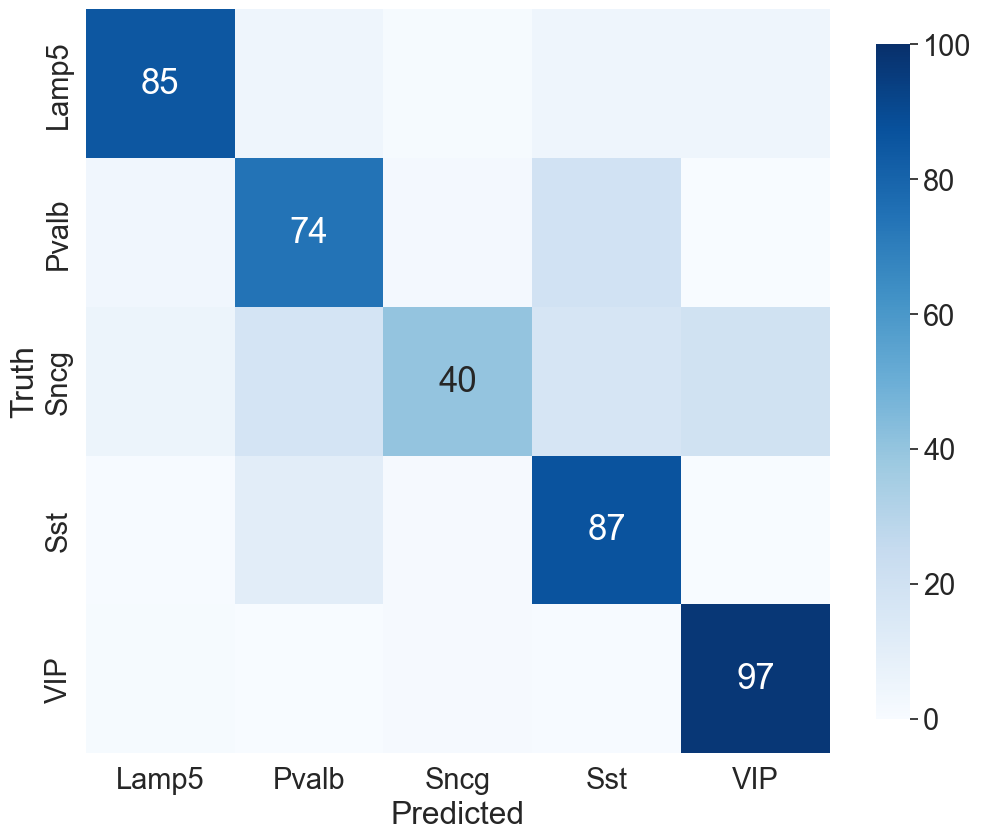

In [17]:
###plot confusion matrix of subclass level truth vs prediction

plt.figure(figsize = (12,12))
sns.set(font_scale = 1.9)
off_diag_mask = np.eye(*met_subclass_df_per.shape, dtype=bool)
ax = sns.heatmap(met_subclass_df_per, square = True, yticklabels = True, annot = False, annot_kws={"size":15}, vmin = 0, vmax = 100, cbar_kws = {"shrink":0.73}, cmap = 'Blues')
sns.heatmap(met_subclass_df_per, square = True, yticklabels = True, vmin = 0, vmax = 100, mask = ~off_diag_mask ,cbar = False, cmap = 'Blues', annot = True, annot_kws={"size":25}, ax = ax)

plt.ylabel("Truth")
plt.xlabel("Predicted")
plt.savefig('Final_Patch_Seq_RFC_Conf_Matrix_RowNorm_subclass_tight_diag_blues_reorder_lgfont_090624_blues.pdf')